In [1]:
!pip install tensorflow

In [2]:
!pip install gradio

IMPORT IMPORTANT LIBARIES -

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import gradio as gr
from PIL import Image

DOWNLOADING DATA FROM KAGGLE -

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshat103/e-waste-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 11.8M/11.8M [00:01<00:00, 7.55MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/akshat103/e-waste-image-dataset/versions/1


###  Format: Folder-based image classification dataset  

In [1]:
testpath= r'C:\Users\Edunet Foundation\Downloads\project\E waste data\modified-dataset\test'
trainpath= r'C:\Users\Edunet Foundation\Downloads\project\E waste data\modified-dataset\train'
validpath = r'C:\Users\Edunet Foundation\Downloads\project\E waste data\modified-dataset\val'

In [4]:
# Ensure tensorflow is imported as tf before using it
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import kagglehub # Import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshat103/e-waste-image-dataset")

print("Path to dataset files:", path)

# Use the downloaded path to construct the train, test, and validation paths
# Assuming the dataset structure within the downloaded path is 'modified-dataset/train', etc.
# You might need to adjust the subdirectories based on the actual downloaded structure
trainpath = tf.io.gfile.join(path, 'modified-dataset', 'train')
testpath = tf.io.gfile.join(path, 'modified-dataset', 'test')
validpath = tf.io.gfile.join(path, 'modified-dataset', 'val')


# Now tf is defined and can be used
datatrain= tf.keras.utils.image_dataset_from_directory(trainpath,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)


Path to dataset files: /kaggle/input/e-waste-image-dataset
Found 2400 files belonging to 10 classes.


In [5]:
datatest=tf.keras.utils.image_dataset_from_directory(testpath,shuffle = False, image_size = (128,128), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


In [6]:
datavalid = tf.keras.utils.image_dataset_from_directory(validpath,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


In [7]:
print(len(datatrain.class_names))
class_names = datatrain.class_names
print(class_names)

10
['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


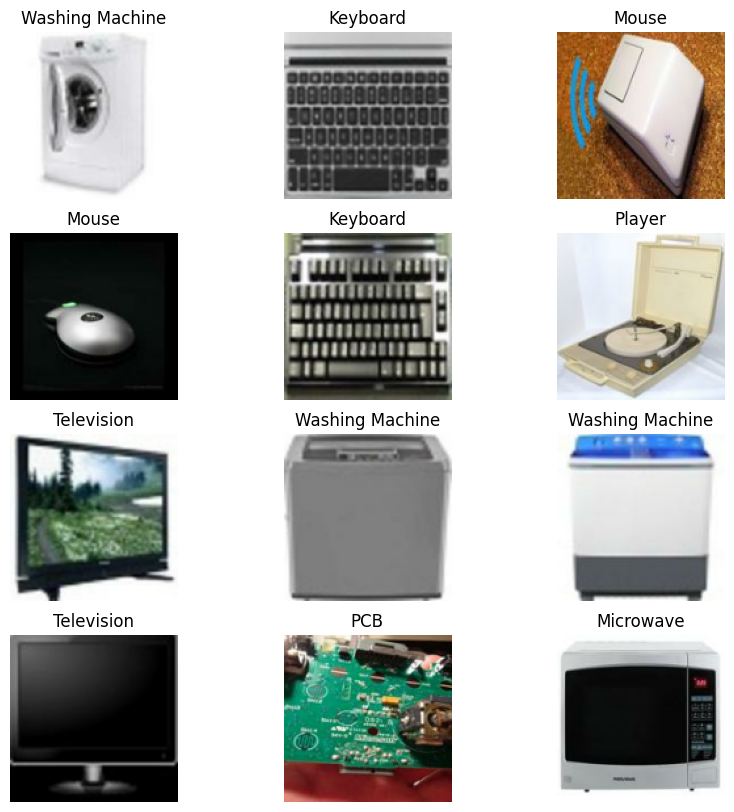

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import matplotlib.pyplot as plt # Ensure this line is present and executed
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import gradio as gr
from PIL import Image
# Set the size of the entire figure (width=10, height=10 inches)
plt.figure(figsize=(10, 10))

# Take one batch from the dataset and iterate over the images and labels
for images, labels in datatrain.take(1):
    # Display the first 12 images from the batch
    for i in range(12):
        # Create a 4x3 grid of subplots and select the (i+1)th position
        ax = plt.subplot(4, 3, i + 1)

        # Display the image; convert the tensor to a NumPy array and ensure correct type
        plt.imshow(images[i].numpy().astype("uint8"))

        # Set the title of the subplot to the class name of the image
        plt.title(class_names[labels[i]])

        # Remove axis ticks and labels for clarity
        plt.axis("off")


In [10]:
def plot_class_distribution(dataset, title="Class Distribution"):
    """
    Plots the number of items per class in a given dataset.

    Args:
        dataset: A tf.data.Dataset object created using image_dataset_from_directory
        title: Title for the plot (e.g., 'Train Data Distribution')
    """

    class_counts = {}  # Dictionary to hold the count of each class

    # Iterate through the batches in the dataset
    for images, labels in dataset:
        # Convert labels tensor to numpy array and loop through each label
        for label in labels.numpy():
            class_name = dataset.class_names[label]  # Get class name using label index
            # Increment the count for this class
            class_counts[class_name] = class_counts.get(class_name, 0) + 1


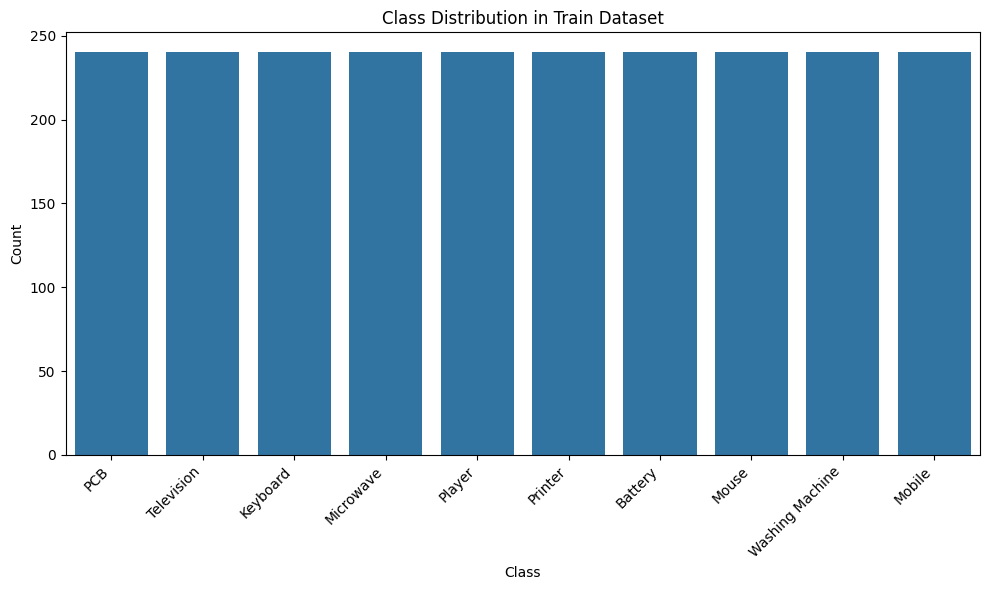

{'Battery': 30,
 'Keyboard': 30,
 'Microwave': 30,
 'Mobile': 30,
 'Mouse': 30,
 'PCB': 30,
 'Player': 30,
 'Printer': 30,
 'Television': 30,
 'Washing Machine': 30}

In [16]:
# This cell contains the modified function and how to use it.
def plot_class_distribution(dataset, title="Class Distribution"):
    """
    Plots the number of items per class in a given dataset.

    Args:
        dataset: A tf.data.Dataset object created using image_dataset_from_directory
        title: Title for the plot (e.g., 'Train Data Distribution')
    """

    class_counts = {}  # Dictionary to hold the count of each class

    # Iterate through the batches in the dataset
    for images, labels in dataset:
        # Convert labels tensor to numpy array and loop through each label
        for label in labels.numpy():
            class_name = dataset.class_names[label]  # Get class name using label index
            # Increment the count for this class
            class_counts[class_name] = class_counts.get(class_name, 0) + 1

    # Return the dictionary containing class counts
    return class_counts

# Now call the function for the desired dataset (e.g., datatrain)
train_class_counts = plot_class_distribution(datatrain, title="Train Data Distribution")

# Prepare data for plotting using the returned dictionary
class_names = list(train_class_counts.keys())  # List of class names
counts = list(train_class_counts.values())     # Corresponding counts for each class

# You can now proceed with plotting using class_names and counts
# Example plotting (add this part to visualize the distribution)
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=counts)
plt.title("Class Distribution in Train Dataset")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# You can repeat the process for datatest and datavalid if needed
# test_class_counts = plot_class_distribution(datatest, title="Test Data Distribution")
# valid_class_counts = plot_class_distribution(datavalid, title="Validation Data Distribution") # Corresponding counts for each class
plot_class_distribution(datatrain, "Training Data Distribution")
plot_class_distribution(datavalid, "Validation Data Distribution")
plot_class_distribution(datatest, "Test Data Distribution")

In [17]:

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [18]:
base_model = tf.keras.applications.EfficientNetV2B0(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [19]:
# Define an EarlyStopping callback to stop training when validation loss stops improving
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',            # Metric to monitor (validation loss here)
    patience=3,                   # Number of epochs to wait after last improvement before stopping
    restore_best_weights=True     # After stopping, restore the model weights from the epoch with the best val_loss
)


In [22]:
# Define the number of classes in your dataset
num_classes = len(datatrain.class_names) # Assuming datatrain has the class names

# Create the complete model
model = tf.keras.Sequential([
    data_augmentation,                   # Add the data augmentation layer
    # Wrap the preprocess_input function in a Lambda layer
    tf.keras.layers.Lambda(lambda x: preprocess_input(x)),
    base_model,                          # Add the pre-trained EfficientNetV2B0 base model
    tf.keras.layers.GlobalAveragePooling2D(), # Add a global average pooling layer to flatten the output
    tf.keras.layers.Dense(num_classes, activation='softmax') # Add the final dense layer for classification
])

# Compile the model
model.compile(
    optimizer='adam',                   # Use the Adam optimizer
    loss='sparse_categorical_crossentropy', # Use sparse categorical crossentropy for integer labels
    metrics=['accuracy']                # Monitor accuracy during training
)

# Print the model summary to check the layers
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 4, 4, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 5,155,648 (19.67 MB)

 Non-trainable params: 763,664 (2.91 MB)

In [23]:
base_model.summary() # Print the architecture summary of the base model

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 128, 128,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 128, 128,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 64, 64,    │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 64, 64,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 64, 64,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 64, 64,    │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 64, 64,    │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 64, 64,    │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 32, 32,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 32, 32,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 32, 32,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 32, 32,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 32, 32,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 32, 32,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 32, 32,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 32, 32,    │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 5,155,648 (19.67 MB)

 Non-trainable params: 763,664 (2.91 MB)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 133ms/step - accuracy: 0.6891 - loss: 1.0270 - val_accuracy: 0.9367 - val_loss: 0.2053
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.9018 - loss: 0.3156 - val_accuracy: 0.9367 - val_loss: 0.2153
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.9328 - loss: 0.2167 - val_accuracy: 0.9467 - val_loss: 0.2125
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.9484 - loss: 0.1725 - val_accuracy: 0.9333 - val_loss: 0.1943
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.9606 - loss: 0.1344 - val_accuracy: 0.9467 - val_loss: 0.1680
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.9606 - loss: 0.1202 - val_accuracy: 0.9267 - val_loss: 0.2370
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.9755 - loss: 0.0870 - val_accuracy: 0.9433 - val_loss: 0.1830
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9745 - loss: 0.0726 - val_accuracy: 0.9

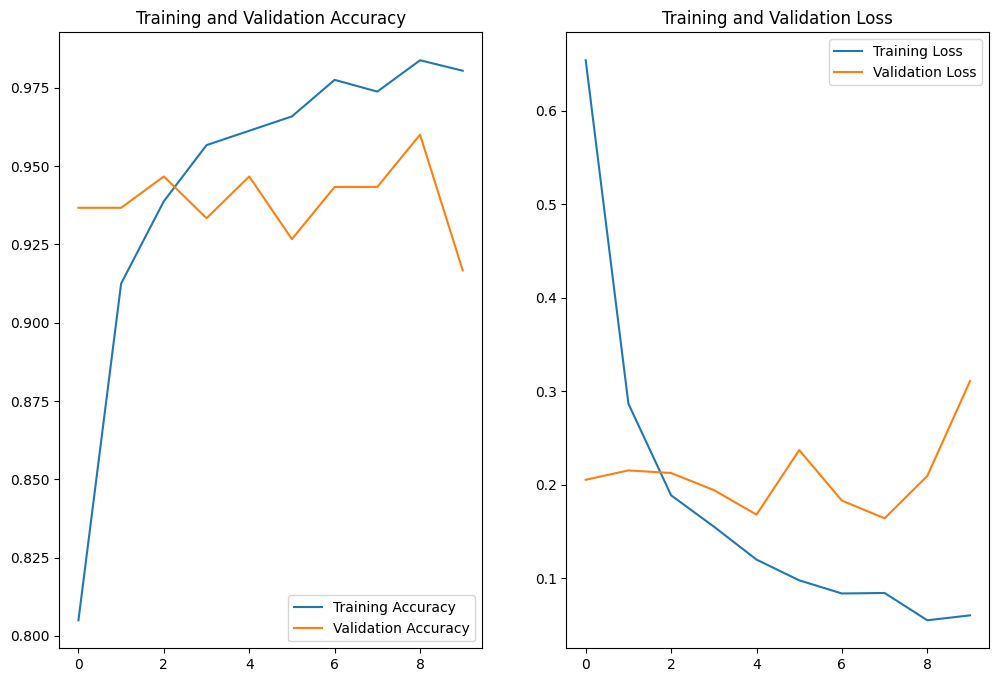

In [26]:
### Plotting Training and Validation Accuracy and Loss Over Epochs

# Train the model and store the training history in the 'history' variable
# Replace `epochs` with the desired number of training epochs
history = model.fit(
    datatrain,
    validation_data=datavalid,
    epochs=10,  # You can adjust the number of epochs
    callbacks=[early] # Include the EarlyStopping callback
)

acc = history.history['accuracy']           # Training accuracy (note the key is 'accuracy' in lowercase)
val_acc = history.history['val_accuracy']   # Validation accuracy (note the key is 'val_accuracy' in lowercase)
loss = history.history['loss']              # Training loss
val_loss = history.history['val_loss']      # Validation loss

# Now you can proceed with plotting using the acc, val_acc, loss, and val_loss variables
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
loss, accuracy = model.evaluate(datatest)
print(f'Test accuracy is{accuracy:.4f}, Test loss is {loss:.4f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9271 - loss: 0.3583
Test accuracy is0.9267, Test loss is 0.3139


In [28]:
### Evaluate Model Performance on Test Data using Confusion Matrix and Classification Report

# Extract true labels from all batches
y_true = np.concatenate([y.numpy() for x, y in datatest], axis=0)  # Ground truth labels

# Get predictions as probabilities and then predicted classes
y_pred_probs = model.predict(datatest)

# Class with highest probability
y_pred = np.argmax(y_pred_probs, axis=1)

# Print confusion matrix and classification report
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 280ms/step
[[27  0  0  0  0  2  0  0  0  1]
 [ 2 28  0  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  1  1  0  0]
 [ 0  0  0 29  0  0  0  0  1  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 29  0  1  0  0]
 [ 1  0  0  0  1  0 24  3  0  1]
 [ 0  0  0  0  0  0  1 29  0  0]
 [ 0  0  2  0  0  0  0  0 28  0]
 [ 1  0  0  0  0  0  0  2  0 27]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       1.00      0.93      0.97        30
           2       0.93      0.93      0.93        30
           3       1.00      0.97      0.98        30
           4       0.97      0.97      0.97        30
           5       0.94      0.97      0.95        30
           6       0.92      0.80      0.86        30
           7       0.78      0.97      0.87        30
           8       0.97      0.93      0.95        30
           9       0.93      0.90      0.92        30

    accuracy                    

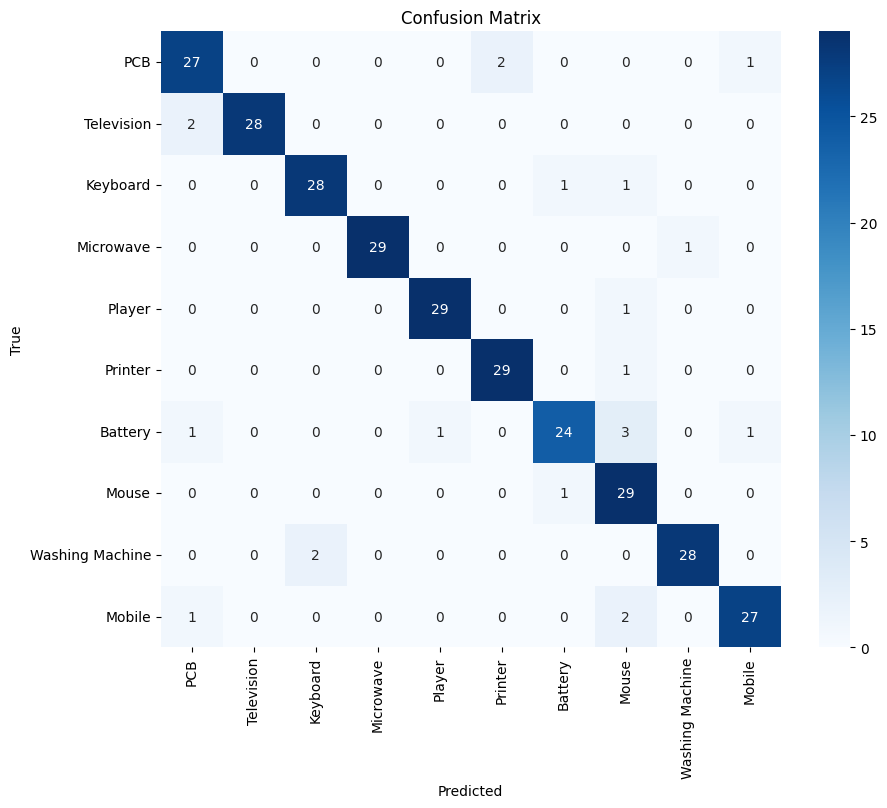

In [29]:
### Plot Confusion Matrix as Heatmap for Better Visualization

cm = confusion_matrix(y_true, y_pred)                                     # Compute confusion matrix
                                                     # Import seaborn for visualization

plt.figure(figsize=(10, 8))                                               # Set figure size
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')                                                 # Create heatmap with class labels

plt.xlabel('Predicted')                                                   # Label for x-axis
plt.ylabel('True')                                                        # Label for y-axis
plt.title('Confusion Matrix')                                             # Title for the plot
plt.show()                                                                # Display the plot


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


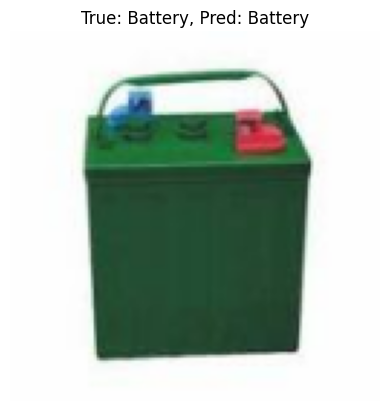

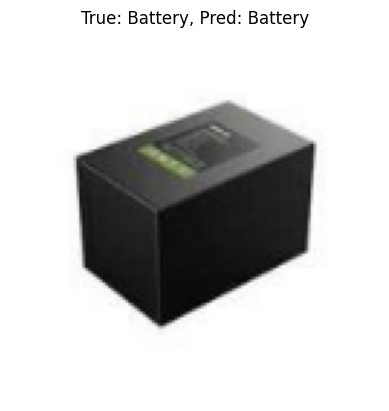

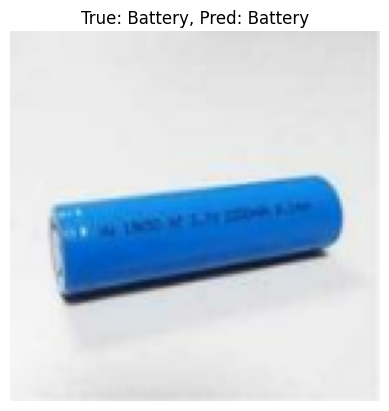

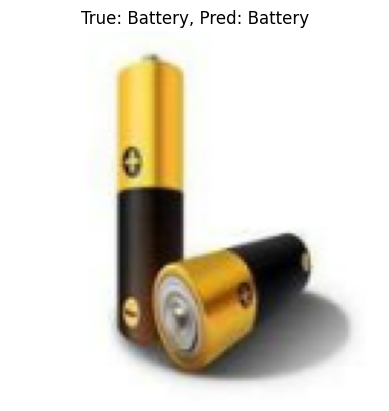

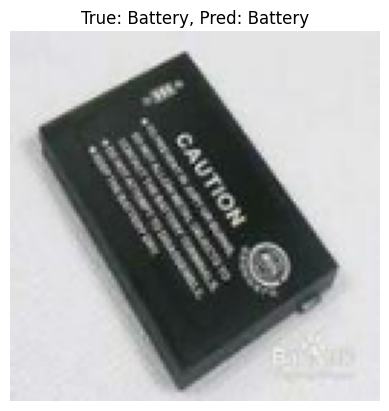

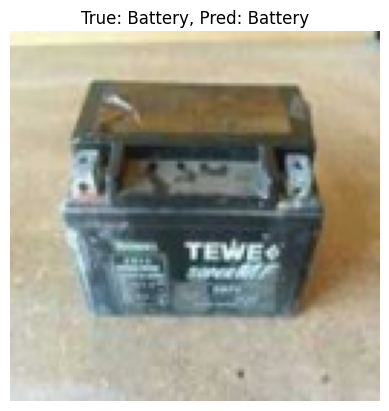

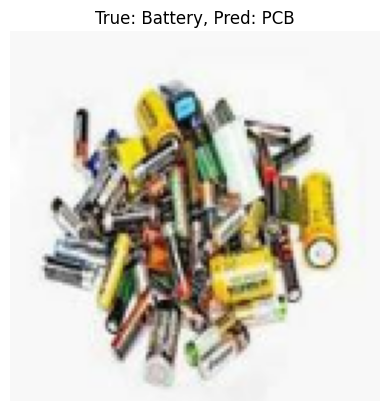

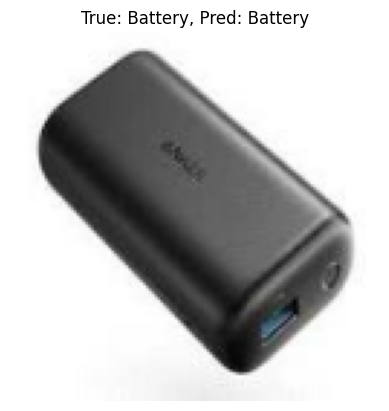

In [30]:
### Display Sample Predictions: True Labels vs Predicted Labels

class_names = datatest.class_names                                           # Get class names from test dataset

for images, labels in datatest.take(1):                                     # Take one batch from test data
    predictions = model.predict(images)                                     # Predict class probabilities
    pred_labels = tf.argmax(predictions, axis=1)                            # Get predicted class indices

    for i in range(8):                                                      # Display first 8 images from batch
        plt.imshow(images[i].numpy().astype("uint8"))                       # Convert tensor to image
        plt.title(f"True: {class_names[labels[i]]}, Pred: {class_names[pred_labels[i]]}")  # Title with labels
        plt.axis("off")                                                     # Hide axes
        plt.show()                                                          # Show image



In [31]:
# Save model in Keras format with architecture, weights, and training configuration
model.save('Efficient_classify.keras')

In [33]:
# Define your class labels
class_names = ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']

# Load your Keras model
# Add safe_mode=False to allow deserialization of the Lambda layer
model = tf.keras.models.load_model('Efficient_classify.keras', safe_mode=False)

In [34]:
!pip install gradio

In [37]:
def classify_image(img):
    # Step 1: Ensure the image is in RGB format
    img = img.convert("RGB")

    # Step 2: Resize and convert to array
    img = img.resize((128, 128))
    img_array = np.array(img, dtype=np.float32)

    # Step 3: Preprocess and add batch dimension
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    # Step 4: Predict using the model
    prediction = model.predict(img_array)
    index = np.argmax(prediction)  # Get index of highest score

    # Step 5: Get class name and confidence
    class_name = class_names[index]
    confidence = prediction[0][index]

    return f"Predicted: {class_name} (Confidence: {confidence:.2f})"

In [38]:
# Create a Gradio interface for the classify_image function
iface = gr.Interface(
    fn=classify_image,          # The function to run when input is given
    inputs=gr.Image(type="pil"), # Input component: expects an image as a PIL object
    outputs="text"              # Output component: displays the result as plain text
)

# Launch the Gradio interface, opening a local web app to interact with the model
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://eaaf99b7bb2cc48545.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
